NAMA  : RETNO HESTININGRUM
NIM   : 210411100053
KELAS : METODE STATISTIKA 2D

# Exponential Smoothing

Exponential Smoothing merupakan teknik untuk memisahkan pola data runtun waktu yang terdiri dari pola stasioner, trend, siklus, dan musiman dari kesalahannya sebanyak mungkin(Montgomery, 2015). Exponential Smoothing atau Penghalusan Exponensial adalah suatu metode peramalan rata-rata bergerak yang memberikan bobot secara eksponensial atau bertingkat pada data-data terbarunya sehingga data-data terbaru tersebut akan mendapatkan bobot yang lebih besar. Dengan kata lain, semakin baru atau semakin kini datanya semakin besar pula bobotnya. Hal ini dikarenakan data yang terbaru dianggap lebih relavan sehingga diberikan bobot yang lebih besar. Parameter penghalusan(smoothing) dilambangkan dengan α (alpha).Exponential smoothing adalah metode yang memberikan bobot eksponensial moving average untuk semua data historis.Dengan menggunakan Exponential smoothing bisa mengestimasi level terkini dan menggunakan untuk peramalan nilai kedepan. Exponential smoothing dibagi menjadi 3 yaitu Single Exponential smoothing, Double Exponential smoothing, dan Triple Exponential smoothing.

#### Rumus Exponential smoothing:

Ft = Ft-1+alpha((αt-1)-(ft-1))

keterangan:

Ft = nilai ramalan untuk periode ke-t

αt-1= nilai aktual periode ke t

Ft-1 = nilai ramalan untuk periode waktu yang lalu; t-1

α = konstanta pemulusan (smoothing constant)

##### NOTE!
1. Apabila data permintaan sangat bergejolak atau tidak stabil dari waktu ke waktu maka dengan memilih nilai α yang mendekati 1, seperti 0,9 atau 0,8 dst

2. Apabila data permintaan relatif stabil atau tidak bergejolak dari waktu ke waktu maka dengan memilih nilai α yang mendekati 0, seperti 0,1 atau 0,2 dst

3. Untuk angka pertama dalam rumus, diperoleh dari rata-rata data permintaan aktual dibagi 12 bulan Di dalam menentukan nilai α dengan cara trial dan error sesuai catatam di atas, saudara juga bisa menghitung dengan rumus α =(2/n+1)

### Single Exponential smoothing (SES)

Single Exponential smoothing (SES) adalah salah satu bagian dari Exponential smoothing methods. pada SES hanya terdapat satu parameter yang perlu diestimasi yaitu nilai  α(alpha). SES cocok digunakan untuk data yang tidak mengandung trend naik maupun turun yang tidak tedeteksi.Nilai peramalan untuk periode ke depan menggunakan SES selalu bernilai konstan.

### Double Exponential Smoothing 

Metode Double expoential smoothing adalah suatu metode yang paling luas digunakan untuk menentukan persamaan trend data pemulusan kedua melalui proses smoothing. Sistem peramalan ini menangkap pola dari data yang telah lalu kemudian digunakan untuk memproyeksikan data yang akan datang.Metode pemulusan eksponensial linier dari  Holt pada prinsipnya serupa dengan Brown kecuali bahwa Holt tidak menggunakan rumus pemulusan berganda secara langsung. Sebagai gantinya, Holt 
memutuskan nilai trend dengan parameter yang berbeda dari dua parameter yang digunakan pada 
deret yang asli. Peramalan dengan menggunakan Double Exponential Smoothing Holt dengan menggunakan 2 parameter yaitu alpha (α) dan beta 

### Triple Exponential Smoothing 

Triple Exponential smoothing (TES) merupakan salah satu metode Exponential smoothing yang memiliki 3 parameter pemulusan yaitu α(alpha), b (beta), y(gamma). Metode ini digunakan ketika data memuat komponen tren dan musiman.

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing as HWES

In [11]:
df = pd.read_csv('data/cheese_fred.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [12]:
df.head()

,total_cheese_production
date,
1921-01-01,14.2
1921-02-01,15.3
1921-03-01,21.1
1921-04-01,28.0
1921-05-01,41.2


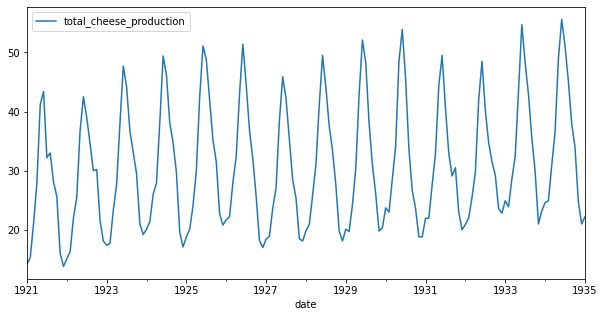

In [13]:
df.plot(figsize=(10,5))
plt.show()

In [14]:
df_train = df.iloc[:-12]
df_test = df.iloc[-12:]

In [15]:
import warnings
warnings.filterwarnings("ignore")

# SES

In [35]:
fit1 = SimpleExpSmoothing(df_train).fit(smoothing_level=0.2,optimized=False)
print(fit1.summary())
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')

                          SimpleExpSmoothing Model Results                         
Dep. Variable:     total_cheese_production   No. Observations:                  157
Model:                  SimpleExpSmoothing   SSE                          17218.763
Optimized:                           False   AIC                            741.509
Trend:                                None   BIC                            747.621
Seasonal:                             None   AICC                           741.772
Seasonal Periods:                     None   Date:                 Tue, 28 Jun 2022
Box-Cox:                             False   Time:                         05:54:18
Box-Cox Coeff.:                       None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
initial

In [36]:
fit2 = SimpleExpSmoothing(df_train).fit()
print(fit2.summary())
fcast2 = fit2.forecast(12).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])

                          SimpleExpSmoothing Model Results                         
Dep. Variable:     total_cheese_production   No. Observations:                  157
Model:                  SimpleExpSmoothing   SSE                           5993.120
Optimized:                            True   AIC                            575.813
Trend:                                None   BIC                            581.926
Seasonal:                             None   AICC                           576.076
Seasonal Periods:                     None   Date:                 Tue, 28 Jun 2022
Box-Cox:                             False   Time:                         05:54:35
Box-Cox Coeff.:                       None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial

# Holt's Method (Double Exponential Smoothing)

In [37]:
fit1 = Holt(df_train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
print(fit1.summary())
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

                                 Holt Model Results                                
Dep. Variable:     total_cheese_production   No. Observations:                  157
Model:                                Holt   SSE                           8958.623
Optimized:                           False   AIC                            642.928
Trend:                            Additive   BIC                            655.153
Seasonal:                             None   AICC                           643.488
Seasonal Periods:                     None   Date:                 Tue, 28 Jun 2022
Box-Cox:                             False   Time:                         05:54:41
Box-Cox Coeff.:                       None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8000000                alpha                False
smoothi

In [38]:
print(fcast1)

1934-02-01    21.989270
1934-03-01    20.281010
1934-04-01    18.572750
1934-05-01    16.864490
1934-06-01    15.156230
1934-07-01    13.447970
1934-08-01    11.739711
1934-09-01    10.031451
1934-10-01     8.323191
1934-11-01     6.614931
1934-12-01     4.906671
1935-01-01     3.198411
Freq: MS, Name: Holt's linear trend, dtype: float64


# Holt Winters (Triple Exponential Smoothing)

In [39]:
#additive
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='add')
fitted = model.fit()
print(fitted.summary())

                         ExponentialSmoothing Model Results                        
Dep. Variable:     total_cheese_production   No. Observations:                  157
Model:                ExponentialSmoothing   SSE                            497.998
Optimized:                            True   AIC                            213.233
Trend:                            Additive   BIC                            262.133
Seasonal:                         Additive   AICC                           218.190
Seasonal Periods:                       12   Date:                 Tue, 28 Jun 2022
Box-Cox:                             False   Time:                         05:54:52
Box-Cox Coeff.:                       None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 Tru

In [40]:
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit()
print(fitted.summary())

                         ExponentialSmoothing Model Results                        
Dep. Variable:     total_cheese_production   No. Observations:                  157
Model:                ExponentialSmoothing   SSE                            475.455
Optimized:                            True   AIC                            205.960
Trend:                            Additive   BIC                            254.860
Seasonal:                   Multiplicative   AICC                           210.917
Seasonal Periods:                       12   Date:                 Tue, 28 Jun 2022
Box-Cox:                             False   Time:                         05:55:08
Box-Cox Coeff.:                       None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 Tru

In [54]:
sales_forecast = fitted.forecast(steps=12)

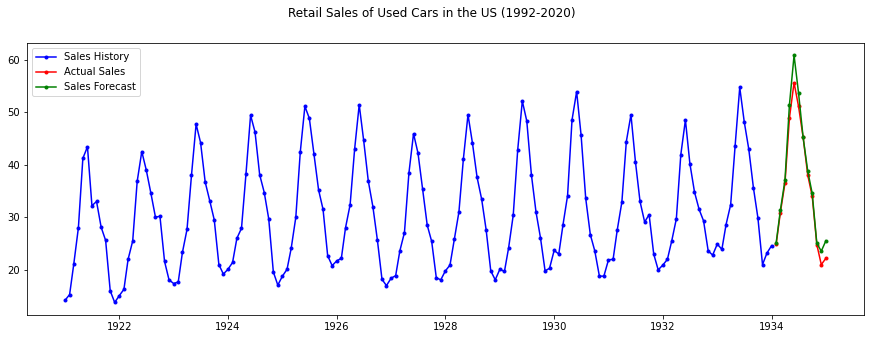

In [55]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series.decomposition import additive_decomposition,multiplicative_decomposition

from luwiji.time_series import illustration


# Error-Trend-Seasonal(ETS)Smoothing Method

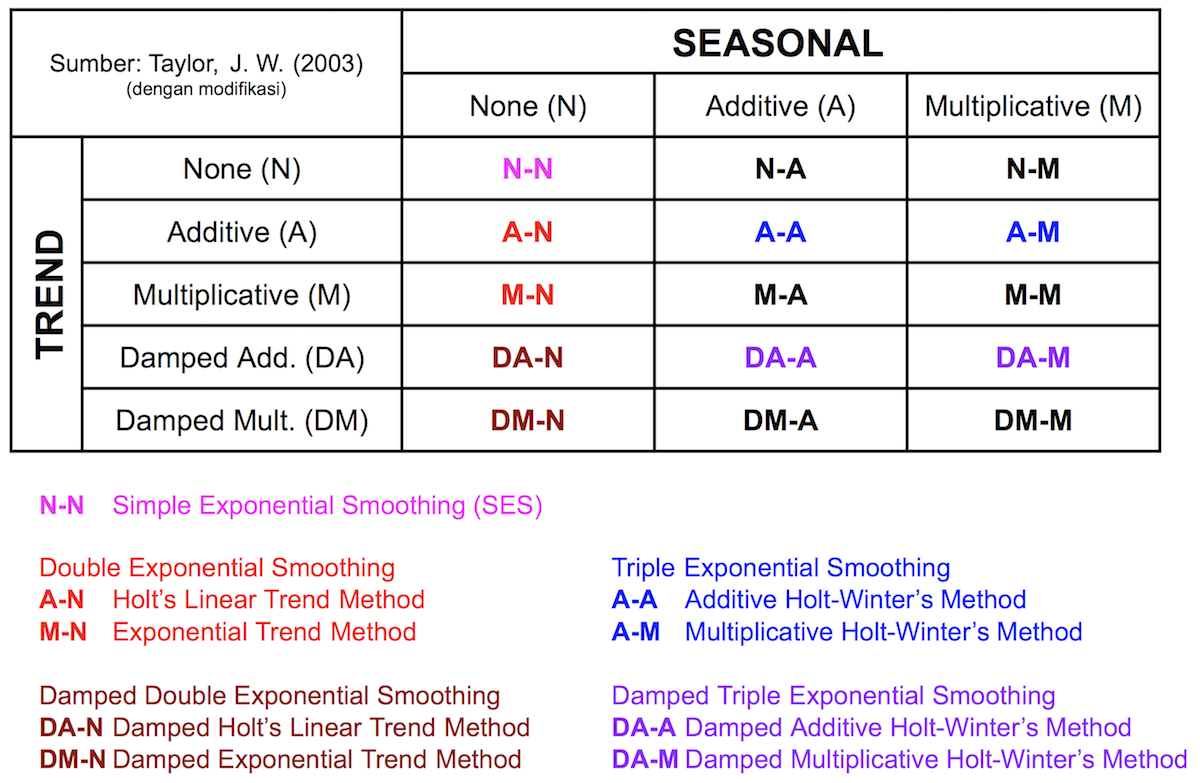

In [13]:
illustration.ets_model

# Exercise 1 :  Chocolatos Production Data

<AxesSubplot:xlabel='date'>

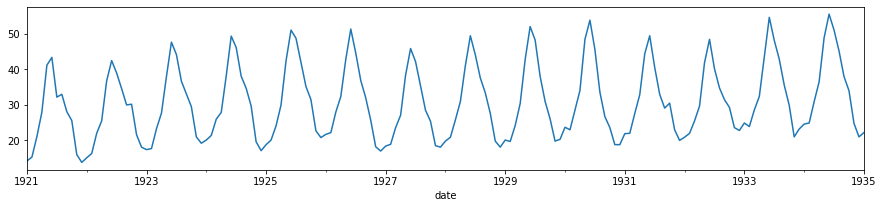

In [57]:
df = pd.read_csv("data/chocolatos_fred.csv", index_col="date", parse_dates=["date"])
series = df.total_cheese_production
X_train, X_test = series[:-25], series[-25:]

series.plot(figsize=(15,3))

In [61]:
es= ExponentialSmoothing(X_train, seasonal="add", seasonal_periods=12)
model = es.fit(optimized=True, use_boxcox=True)

In [62]:
len(X_train)

144

In [63]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

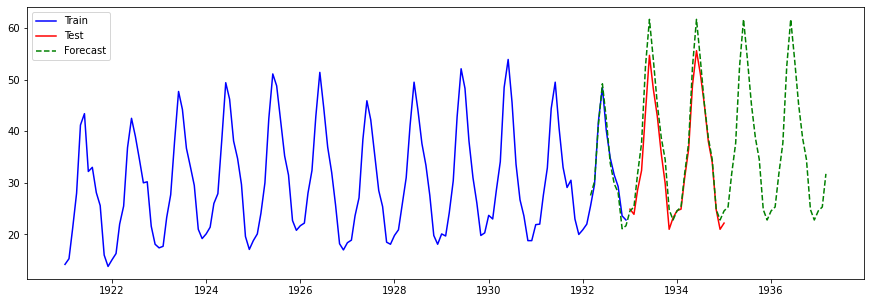

In [64]:
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label='Train')
plt.plot(X_test, "r-", label='Test')
plt.plot(pred, "g--", label='Forecast')
plt.legend()

# Exercise 2 : Airline Passenger Data

<AxesSubplot:xlabel='Date'>

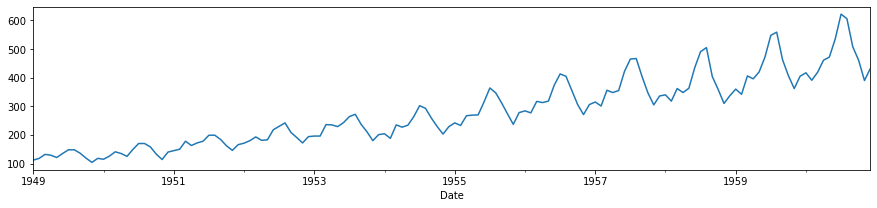

In [58]:
df = pd.read_csv("data/airline.csv", index_col="Date", parse_dates=["Date"])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [67]:
es= ExponentialSmoothing(X_train, trend="add", seasonal="mul", seasonal_periods=12)
model = es.fit(optimized=True, use_boxcox=True)

C:\Users\hesti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [68]:
pred = model.ppred = model.predict(len(X_train)-10, len(X_train)+50)redict(len(X_train)-10, len(X_train)+50)

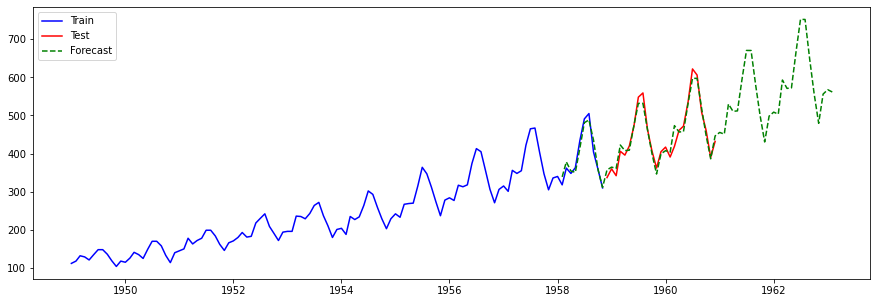

In [69]:
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label='Train')
plt.plot(X_test, "r-", label='Test')
plt.plot(pred, "g--", label='Forecast')
plt.legend()

## Exercise 3 : Christmas Search Interest

<AxesSubplot:xlabel='date'>

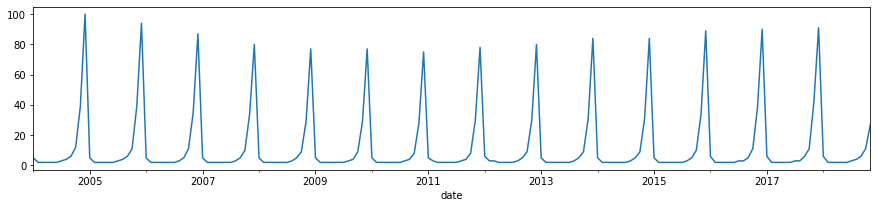

In [97]:
df = pd.read_csv("data/christmas.csv", index_col="date", parse_dates=["date"])
series = df.interest
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

## TRAINING

In [98]:
es= ExponentialSmoothing(X_train, trend="add",damped=True, seasonal="add", seasonal_periods=12)
model = es.fit(optimized=True, use_boxcox=True)

C:\Users\hesti\AppData\Local\Temp/ipykernel_26824/1795980894.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  es= ExponentialSmoothing(X_train,trend="add",damped=True, seasonal="add", seasonal_periods=12)
C:\Users\hesti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hesti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hesti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


## FORECAST

In [99]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

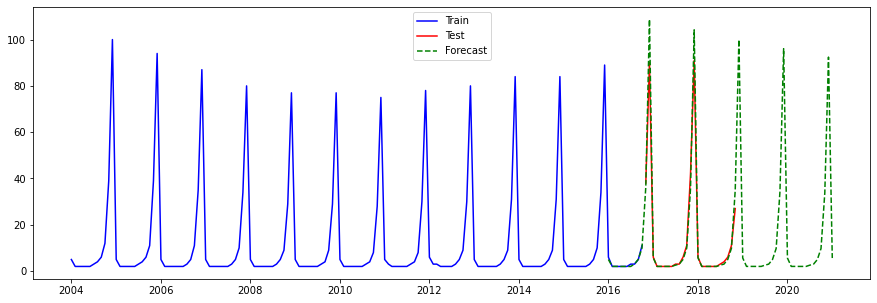

In [95]:
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label='Train')
plt.plot(X_test, "r-", label='Test')
plt.plot(pred, "g--", label='Forecast')
plt.legend()

## Exercise 4 : Champagne Sales

<AxesSubplot:xlabel='date'>

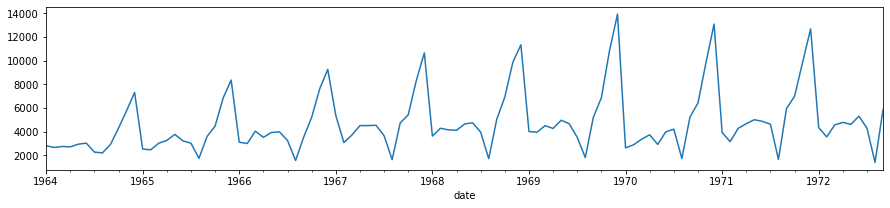

In [100]:
df = pd.read_csv("data/perrin_freres_champagne.csv", index_col="date", parse_dates=["date"])
series = df.sales
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

### TRAINING

In [101]:
es= ExponentialSmoothing(X_train, seasonal="mul", seasonal_periods=12)
model = es.fit(optimized=True, use_boxcox=True)

C:\Users\hesti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hesti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hesti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


### FORECAST

In [102]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

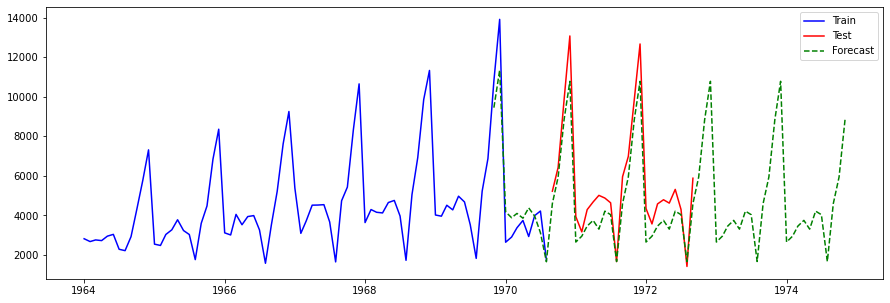

In [103]:
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label='Train')
plt.plot(X_test, "r-", label='Test')
plt.plot(pred, "g--", label='Forecast')
plt.legend()

# MOVING AVERAGE

Moving Average atau Rata-rata bergerak adalah metode peramalan yang menghitung rata-rata suatu nilai runtut waktu dan kemudian digunakan untuk memperkirakan nilai pada periode selanjutnya. Moving Average diperoleh melalui penjumlahan dan pencarian nilai rata-rata dari sejumlah periode tertentu, kemudian menghilangkan nilai terlamanya dan menambah nilai baru.

Moving Average lebih baik digunakan untuk menghitung data yang bersifat stabil atau data yang tidak berfluktuasi dengan tajam.Oleh karena itu munculah metode-metode Moving Average yang lain untuk mencoba mengatasinya diantaranya : Metode Weighted Moving Average(WMA) dan Metode Exponensial Moving Average(EMA). Sedangkan Metode Moving Average yang sederhana ini sering disebut Simple Moving Average (SMA).

##### Cara Menghitung Moving Avarage :

1. Mengidentifikasi pola historis dari data aktual permintaan

2. Memilih model peramalan yang sesuai dengan pola historis dari data aktual permintaan

3. Melakukan analisis data berdasarkan model peramalan yang dipilih

4. Memilih model peramalan yang tepat berdasarkan MAD (Mean Absolut Deviation) terkecil

5. Memeriksa keandalan model peramalan berdasarkan peta kontrol tracking signal


##### Rumus Moving Avarage:

Moving average (n) periode = sigma dari (permintaan dalam n - periode terdahulu) kemudian dibagi n dimana (n) adalah banyaknya periode dalam model Moving average, Apabila kita menggunakan Moving average 4 periode, maka rumus dari Moving average 4 periode adalah sigma dari (permintaan dalam 4 - periode terdahulu) dibagi 4

In [22]:
import pandas as pd
d=pd.read_csv("data/moving_avarage.csv")
print(d)

    barang
0      255
1      221
2      245
3      301
4      260
5      431
6      400
7      422
8      345
9      397
10     289
11     277
12     290
13     398
14     387
15     370
16     313
17     333
18     452
19     376
20     445
21     523
22     324
23     336
24     298
25     378
26     373
27     443
28     374
29     227
30     356
31     412
32     444
33     232
34     357
35     441


In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# mengambil baris dan kolom
d['prediksi']=d.iloc[:,0].rolling(window=3).mean()
print(d)

    barang    prediksi
0      255         NaN
1      221         NaN
2      245  240.333333
3      301  255.666667
4      260  268.666667
5      431  330.666667
6      400  363.666667
7      422  417.666667
8      345  389.000000
9      397  388.000000
10     289  343.666667
11     277  321.000000
12     290  285.333333
13     398  321.666667
14     387  358.333333
15     370  385.000000
16     313  356.666667
17     333  338.666667
18     452  366.000000
19     376  387.000000
20     445  424.333333
21     523  448.000000
22     324  430.666667
23     336  394.333333
24     298  319.333333
25     378  337.333333
26     373  349.666667
27     443  398.000000
28     374  396.666667
29     227  348.000000
30     356  319.000000
31     412  331.666667
32     444  404.000000
33     232  362.666667
34     357  344.333333
35     441  343.333333


In [25]:
# merubah angka NAN agar dapat dihitung
d['prediksi']=d['prediksi'].replace(np.nan,0)
print(d)

    barang    prediksi
0      255    0.000000
1      221    0.000000
2      245  240.333333
3      301  255.666667
4      260  268.666667
5      431  330.666667
6      400  363.666667
7      422  417.666667
8      345  389.000000
9      397  388.000000
10     289  343.666667
11     277  321.000000
12     290  285.333333
13     398  321.666667
14     387  358.333333
15     370  385.000000
16     313  356.666667
17     333  338.666667
18     452  366.000000
19     376  387.000000
20     445  424.333333
21     523  448.000000
22     324  430.666667
23     336  394.333333
24     298  319.333333
25     378  337.333333
26     373  349.666667
27     443  398.000000
28     374  396.666667
29     227  348.000000
30     356  319.000000
31     412  331.666667
32     444  404.000000
33     232  362.666667
34     357  344.333333
35     441  343.333333


In [27]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(d['prediksi'],d['barang'])
rmse=np.sqrt(mse)
print(" MSE : ", mse)
print("RMSE : ", rmse)

 MSE :  6321.598765432099
RMSE :  79.50848234894248


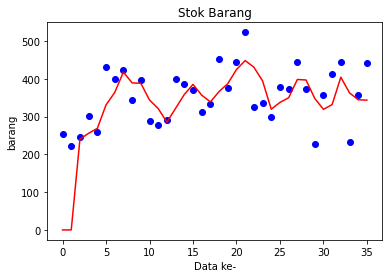

In [28]:
a=range(len(d))
plt.scatter(a, d['barang'], color = 'blue')
plt.plot(a, d['prediksi'], color = 'red')
plt.title('Stok Barang')
plt.xlabel('Data ke-')
plt.ylabel('barang')
plt.show()